In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd
from IPython.display import display, Image, Markdown

from get_dynamics import change_positions, show_dynamics

In [3]:
now = datetime.now().date()
offset = MonthEnd()

<h3>Загрузка исходных данных</h3>

In [4]:
names = ['geo', 'url', 'note', 'cost', 'duration']
data = pd.read_csv('../raw_data.csv', names=names, index_col=[0,1]).fillna('')

In [77]:
%store -r organic
%store -r positions

<h2>1. Анализ бюджета</h2>

### Таблица расходов

In [5]:
curr_month = data.index[-1][0]
data.loc[curr_month]

,geo,url,note,cost,duration
0,both,https://sape.ru,биржа арендных ссылок,4000.00,1
1,both,https://etxt.biz,тексты,1055.00,1
2,both,https://ru.depositphotos.com/,фотосток,702.64,1
3,both,https://text.ru/,тексты,0.00,1
4,msk,https://collections.yandex.ru/user/love-foreve...,+500 карточек,3552.20,12
5,msk,http://www.urasvadba.ru/4062,,1009.50,1
6,spb,http://www.svadbaspb.ru/dress/133/,,505.00,1
7,spb,http://www.svadbaspb.ru/,,2020.00,1
9,msk,http://tableplanner.ru,,1090.00,1
10,spb,http://www.urasvadba.ru/svadebnye-statyi/77,,606.30,1


**cost** — стоимость размещения: 0 — условно бесплатно.

**duration** — время размещения в месяцах: 1 — помесячная оплата, 12 — бессрочное размещение.

<a href="https://yadi.sk/d/Nh-WeRpo3Jfskg">Скачать</a> файл с исходными данными.

<a href="https://yadi.sk/d/1EXvjiS13JZEna">Посмотреть</a> платёжную информацию.

### Расходы в разрезе регионов за текущий период

In [6]:
#data.groupby('reg')[['cost']].sum()
budget = 51480.0
consumption = pd.pivot_table(data.loc[curr_month], values='cost', index=['geo'], 
                         aggfunc=sum, margins=True).loc['All']
budget - consumption

cost   -105.64
Name: All, dtype: float64

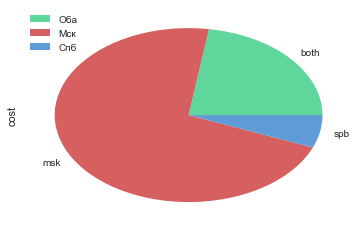

In [7]:
sns.set()
colors = ['#5fd69b', '#d65f5f', '#5f9bd6']
pd.pivot_table(data.loc[curr_month], values='cost', index=['geo'], 
                         aggfunc=sum).plot(kind='pie', subplots=True, colors=colors)
plt.legend(['Оба','Мск', 'Спб'])

## 2. Анализ трафика

### 2.1. LOVE-FOREVER.RU

Таблица с данными по величине поискового трафика c 2017 года и его изменениям к месяцу и году.

In [58]:
# organic = organic.applymap(lambda x: '{:.2f}'.format(x))
show_dynamics(organic['msk']['2017':'2018'], 'branded')

,traffic,branded,MoM,YoY
2017-01-31,14468,9.39,60.1,-9.8
2017-02-28,12187,↓7.72 (-1.67),-15.8,-29.1
2017-03-31,14330,↑10.27 (+2.55),17.6,-19.6
2017-04-30,13821,↓10.19 (-0.08),-3.6,-21.8
2017-05-31,15041,↓9.60 (-0.59),8.8,-19.2
2017-06-30,15083,↓8.86 (-0.74),0.3,-19.9
2017-07-31,13169,↓7.55 (-1.31),-12.7,-22.8
2017-08-31,11153,↑7.65 (+0.1),-15.3,-29.1
2017-09-30,9186,↓6.64 (-1.01),-17.6,-31.9
2017-10-31,9752,↑6.85 (+0.21),6.2,-15.1


**Комментарий:** Органический трафик немного вырос относительно предыдущего месяца.
Доля брендового трафика увеличилась пропорционально.

<p><b>branded</b> — количество брендового трафика, %
<br/><b>YoY</b> — изменения год к году, %
<br/><b>MoM</b> — изменения месяц к месяцу, %</p>

**Источник:** https://metrika.yandex.ru

### Линейная диаграмма изменения трафика

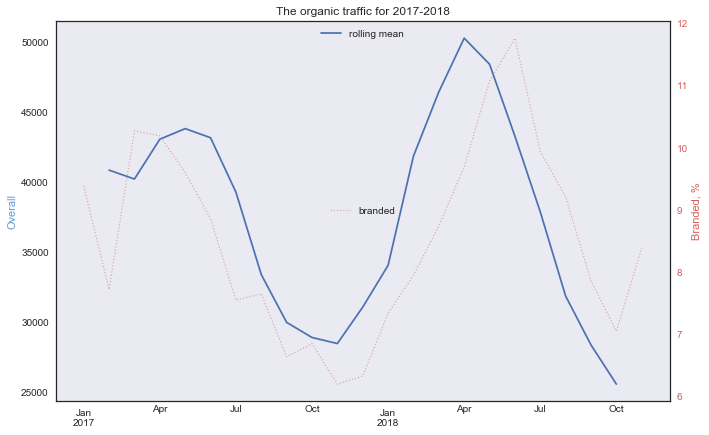

In [66]:
red, blue = '#d65f5f', '#5f9bd6'

fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(1,1,1)

with sns.axes_style('white'):
    #organic['msk']['2017':'2018'].traffic.plot(ax=ax, color=blue)
    organic['msk']['2017':'2018'].traffic.rolling(3, center=True, win_type='gaussian').sum(std=10).plot(ax=ax, label='rolling mean')
    ax.set_title('The organic traffic for 2017-2018')
    ax.set_ylabel('Overall', color=blue)
# ax.legend(loc='upper right');
    ax2 = ax.twinx()
    organic['msk']['2017':'2018'].branded.plot(color=red, linewidth=1.2, alpha=.5, style=':', label='branded')
# ax2.plot(y1, 'r-')
    ax2.set_ylabel('Branded, %', color=red)
    for tl in ax2.get_yticklabels():
        tl.set_color(red)
    ax.legend(frameon=False, loc='upper center',)
    ax2.legend(frameon=False, loc='center')

# average moving with window = 4 and std = 10
# organic['msk'].traffic.rolling(4, center=True, win_type='gaussian').sum(std=10).plot()

### Подсветка данных

In [12]:
# display(Image('img/data_neg_select.png'))

Отрицательные изменения (падение трафика) выделены красным.

In [13]:
# display(Image('img/data_grad.png'))

Ячейки таблицы градиентно залиты цветом в зависимости от величины содержимого.

### Диаграмма изменеия значений MoM 

In [68]:
negative_MoM = organic['msk']['2016':'2018']['MoM'] < 0

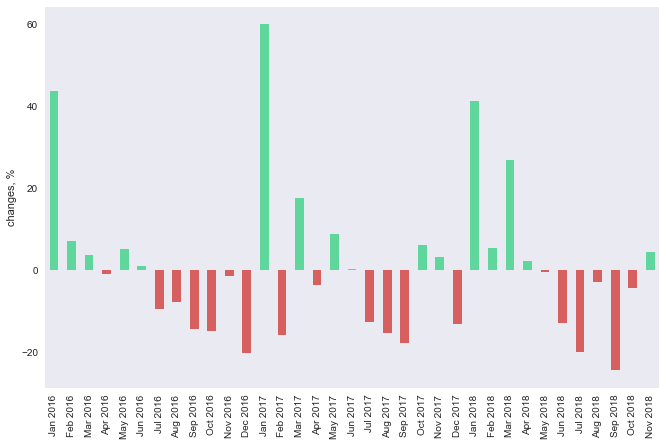

In [69]:
fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(1,1,1)
with sns.axes_style('white'):
    organic['msk']['2016':'2018'].MoM.plot(ax=ax, kind='bar', stacked=True, 
                 color=negative_MoM.map({True: '#d65f5f', False: '#5fd69b'}));
    ax.set_ylabel('changes, %');
    ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in organic['msk']['2016':'2018'].index]);

На диаграмме чётко видна сезонная волатильность поискового трафика.

### 2.2. SPB.LOVE-FOREVER.RU

Таблица с данными по органическому трафику с марта 2017

In [70]:
show_dynamics(organic['spb'], 'branded')

,traffic,branded,MoM,YoY
2017-03-31,13,15.38,NaN,NaN
2017-04-30,508,↑17.72 (+2.34),3807.7,NaN
2017-05-31,998,↑18.14 (+0.42),96.5,NaN
2017-06-30,1296,↓14.27 (-3.87),29.9,NaN
2017-07-31,1259,↓12.07 (-2.2),-2.9,NaN
2017-08-31,1065,↑16.81 (+4.74),-15.4,NaN
2017-09-30,1242,↓7.97 (-8.84),16.6,NaN
2017-10-31,1251,↑11.51 (+3.54),0.7,NaN
2017-11-30,1386,↓11.47 (-0.04),10.8,NaN
2017-12-31,1731,↓10.63 (-0.84),24.9,NaN


**Комментарий:**

In [71]:
# Средний показатель брендового трафика, %
"{}%".format(round(organic['spb']['branded'].mean(), 2))

'10.78%'

## 3. Анализ позиций

### 3.1. LOVE-FOREVER.RU

#### Позиции с интервалом в 7-10 дней
Выборка за сентябрь-октябрь

In [72]:
All = slice(None)
cols_m = positions['msk'].columns.tolist()
indx_m = cols_m.index('salon-love-forever.ru')
cols_m.append(cols_m.pop(indx_m))

In [73]:
# positions['msk'] = positions['msk'].fillna(51).applymap(lambda x: int(x))
change_positions(positions['msk'][cols_m].loc[(slice('2018-10','2018-11'), All), All]) # .loc[['201707', '201711'], :]

bel-avantage.ru domvesta.ru marytrufel.ru  \
2018-10-03 вечерние платья               51          15            51   
           свадебные платья               2           7            21   
           свадебный салон               24          16             1   
2018-10-10 вечерние платья               51          44            31   
           свадебные платья               2           4             5   
           свадебный салон               14          25             1   
2018-10-17 вечерние платья               51          25            37   
           свадебные платья               2           4             8   
           свадебный салон               32          20             1   
2018-10-25 вечерние платья               51          20            39   
           свадебные платья               2           5            14   
           свадебный салон               25          18             2   
2018-11-05 вечерние платья               51          16            46   
           свадебные платья               2           3            10   
           свадебный салон               18          20             2   
2018-11-12 вечерние платья               51          19            46   
           свадебные платья               2           4             9   
           свадебный салон               33          22             2   
2018-11-19 вечерние платья               51          22            45   
           свадебные платья               1           4             8   
           свадебный салон               30          13             1   
2018-11-26 вечерние платья               51    ↑21 (+1)      ↑37 (+8)   
           свадебные платья         ↓2 (-1)           4             8   
           свадебный салон         ↓37 (-7)    ↑12 (+1)             1   

                            salon-love-forever.ru  
2018-10-03 вечерние платья                     22  
           свадебные платья                    43  
           свадебный салон                     11  
2018-10-10 вечерние платья                      7  
           свадебные платья                    44  
           свадебный салон                     11  
2018-10-17 вечерние платья                      7  
           свадебные платья                     9  
           свадебный салон                     23  
2018-10-25 вечерние платья                      6  
           свадебные платья                    11  
           свадебный салон                     11  
2018-11-05 вечерние платья                      9  
           свадебные платья                     7  
           свадебный салон                     10  
2018-11-12 вечерние платья                     13  
           свадебные платья                     7  
           свадебный салон                     17  
2018-11-19 вечерние платья                     10  
           свадебные платья                     5  
           свадебный салон                      9  
2018-11-26 вечерние платья               ↓18 (-8)  
           свадебные платья               ↓7 (-2)  
           свадебный салон              ↓19 (-10)

**Комментарий:** нестабильная ситуация по позициям — что в основной выдаче, что в XML — все еще заметна. 

#### Среднее значение позиций по месяцам и его изменение

In [74]:
change_positions(positions['msk'][cols_m].unstack().resample('M', 
                            kind='period').mean().applymap(lambda x: round(x)).stack())

bel-avantage.ru domvesta.ru marytrufel.ru  \
2017-06 вечерние платья               51          23            44   
        свадебные платья               3           6            12   
        свадебный салон               15           4            11   
2017-07 вечерние платья               51          19            45   
        свадебные платья               2           5            19   
        свадебный салон               12           4             5   
2017-08 вечерние платья               51          26            44   
        свадебные платья               2           6            10   
        свадебный салон               38          23            13   
2017-09 вечерние платья               51          28            38   
        свадебные платья               2           5             8   
        свадебный салон               28          16             1   
2017-10 вечерние платья               51          26            40   
        свадебные платья               2           5            12   
        свадебный салон               24          20             1   
2017-11 вечерние платья               51          21            41   
        свадебные платья               2           4             8   
        свадебный салон               34          17             1   
2017-12 вечерние платья               51          21            51   
        свадебные платья               1          34            17   
        свадебный салон               32          11             1   
2018-01 вечерние платья               51          35            51   
        свадебные платья               1          44            11   
        свадебный салон               50          10             2   
2018-02 вечерние платья               51          45            51   
        свадебные платья               1          42            43   
        свадебный салон               26          15             1   
2018-03 вечерние платья               51          50            51   
        свадебные платья               3          42            16   
        свадебный салон               44          25             3   
2018-04 вечерние платья               51          40            51   
        свадебные платья               4          42            24   
        свадебный салон               33          37             8   
2018-05 вечерние платья               51          43            51   
        свадебные платья               2          44            21   
        свадебный салон               35          18             9   
2018-06 вечерние платья               51          37            47   
        свадебные платья               2          34            10   
        свадебный салон               41           9             4   
2018-07 вечерние платья               51          20            49   
        свадебные платья               3           5            20   
        свадебный салон               10           4             4   
2018-08 вечерние платья               51          29            46   
        свадебные платья               2          21            14   
        свадебный салон               29           7             4   
2018-09 вечерние платья               51          28            38   
        свадебные платья               2           5             8   
        свадебный салон               28          16             1   
2018-10 вечерние платья               51          26            40   
        свадебные платья               2           5            12   
        свадебный салон               24          20             1   
2018-11 вечерние платья               51    ↑20 (+6)      ↓44 (-4)   
        свадебные платья               2     ↑4 (+1)       ↑9 (+3)   
        свадебный салон         ↓30 (-6)    ↑17 (+3)       ↓2 (-1)   

                         salon-love-forever.ru  
2017-06 вечерние платья                     14  
        свадебные платья                    17  
        свадебный салон    

### 3.2. SPB.LOVE-FOREVER.RU

In [75]:
# Перемещение столбца spb.salon-love-forever.ru в крайнюю правую часть таблицы
cols = positions['spb'].columns.tolist()
indx = cols.index('spb.salon-love-forever.ru')
cols.append(cols.pop(indx))

In [78]:
positions['spb'] = positions['spb'].fillna(51).applymap(lambda x: int(x))
# change_positions(positions['spb'][cols].loc[(slice('2018-01','2018-02'), All), All].unstack().resample('W', 
# kind='period').mean().applymap(lambda x: round(x)).stack())
change_positions(positions['spb'][cols].loc[(slice('2018-10','2018-11'), All), All]) # .loc[['201707', '201711'], :]

jullybride.ru milanovera.ru spb.marytrufel.ru  \
2018-10-03 вечерние платья              2            51                51   
           свадебные платья             3             2                24   
           свадебный салон              4            51                23   
2018-10-10 вечерние платья              4             7                51   
           свадебные платья             6             3                 9   
           свадебный салон              8            51                13   
2018-10-17 вечерние платья              3             2                51   
           свадебные платья             4             1                15   
           свадебный салон              3            51                19   
2018-10-25 вечерние платья              2             5                51   
           свадебные платья             4             2                21   
           свадебный салон              2            51                21   
2018-11-05 вечерние платья             16             2                51   
           свадебные платья            15             2                24   
           свадебный салон             17            51                25   
2018-11-12 вечерние платья             12             1                51   
           свадебные платья            13             2                18   
           свадебный салон             33            51                17   
2018-11-19 вечерние платья             12             1                51   
           свадебные платья            13             2                18   
           свадебный салон             33            51                17   
2018-11-26 вечерние платья        ↑6 (+6)             1                51   
           свадебные платья      ↓17 (-4)             2          ↑16 (+2)   
           свадебный салон      ↑20 (+13)            51          ↓18 (-1)   

                            vbelom.ru vesnawedding.ru  \
2018-10-03 вечерние платья         11              51   
           свадебные платья         6               1   
           свадебный салон          1               3   
2018-10-10 вечерние платья          8              51   
           свадебные платья        18               1   
           свадебный салон          1               5   
2018-10-17 вечерние платья         10              51   
           свадебные платья         9               2   
           свадебный салон          1               2   
2018-10-25 вечерние платья          9              51   
           свадебные платья         9               1   
           свадебный салон          1               3   
2018-11-05 вечерние платья          7              51   
           свадебные платья        11               1   
           свадебный салон          1               2   
2018-11-12 вечерние платья         13              51   
           свадебные платья         7               1   
           свадебный салон          1               3   
2018-11-19 вечерние платья         13              51   
           свадебные платья         7               1   
           свадебный салон          1               3   
2018-11-26 вечерние платья   ↑10 (+3)              51   
           свадебные платья   ↑6 (+1)               1   
           свадебный салон          1         ↓4 (-1)   

                            spb.salon-love-forever.ru  
2018-10-03 вечерние платья                         19  
           свадебные платья                         5  
           свадебный салон                         24  
2018-10-10 вечерние платья                         25  
           свадебные платья                         8  
           свадебный салон                         25  
2018-10-17 вечерние платья                         26  
           свадебные платья                         7  
           свадебный салон                         23  
2018-10-25 вечерние платья                         33  
           свадебные платья                         5  
    

**Комментарий:** также наблюдается нестабильный SERP.

#### Среднее значение позиций по месяцам и его изменение

In [79]:
change_positions(positions['spb'][cols].unstack().resample('M', 
                                kind='period').mean().applymap(lambda x: round(x)).stack())

jullybride.ru milanovera.ru spb.marytrufel.ru  \
2017-08 вечерние платья             36            42                51   
        свадебные платья            35            43                41   
        свадебный салон             42            47                36   
2017-09 вечерние платья             10            46                51   
        свадебные платья             8            30                14   
        свадебный салон             19            47                 9   
2017-10 вечерние платья              3            16                51   
        свадебные платья             4             2                17   
        свадебный салон              4            51                19   
2017-11 вечерние платья             13             1                51   
        свадебные платья            16             2                18   
        свадебный салон             27            51                17   
2017-12 вечерние платья              9             2                51   
        свадебные платья            11             2                29   
        свадебный салон             11            51                10   
2018-01 вечерние платья             10             1                47   
        свадебные платья            11             3                26   
        свадебный салон              8            51                 4   
2018-02 вечерние платья             22             3                40   
        свадебные платья            44            41                45   
        свадебный салон              7            51                 8   
2018-03 вечерние платья             30             3                20   
        свадебные платья            14             3                13   
        свадебный салон             11            51                 7   
2018-04 вечерние платья             28             3                24   
        свадебные платья             9             3                 8   
        свадебный салон              5            51                 9   
2018-05 вечерние платья             34             3                26   
        свадебные платья            13             3                13   
        свадебный салон             23            51                10   
2018-06 вечерние платья             25             3                31   
        свадебные платья            12             2                11   
        свадебный салон             10            51                 8   
2018-07 вечерние платья              6            15                51   
        свадебные платья             8            14                34   
        свадебный салон              8            51                 8   
2018-08 вечерние платья             16            20                40   
        свадебные платья             8             9                15   
        свадебный салон             10            49                12   
2018-09 вечерние платья             10            46                51   
        свадебные платья             8            30                14   
        свадебный салон             19            47                 9   
2018-10 вечерние платья              3            16                51   
        свадебные платья             4             2                17   
        свадебный салон              4            51                19   
2018-11 вечерние платья       ↓12 (-9)      ↑1 (+15)                51   
        свадебные платья     ↓14 (-10)             2          ↓19 (-2)   
        свадебный салон      ↓26 (-22)            51                19   

                         vbelom.ru vesnawedding.ru spb.salon-love-forever.ru  
2017-08 вечерние платья         45              51                        35  
        свадебные платья        42              34                        23  
        свадебный салон         35              36                        45  
2017-09 вечерние платья         17              51                        18  
   

**Источник:** https://xml.yandex.ru

Позиции в таблице и в текущей выдаче Яндекса могут отличаться из-за особенностей сервиса xml.yandex, а также от индивидуализации SERP.

**51** — отсутствие сайта в ТОП-50.